In [317]:
import pandas as pd
from pandas import DataFrame, read_excel, merge
import numpy as np
import matplotlib.pyplot as plt
#import rex
from collections import OrderedDict
import seaborn as sns
import matplotlib as mt

In [327]:
data = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Cup_With_Handle\\Cup_With_Handle_updated.csv', encoding="utf-8")

In [328]:
data.dtypes

Unnamed: 0             int64
Num                    int64
date                  object
pattern               object
pattern_name          object
msecurity              int64
colon_count            int64
end_count              int64
cup_bottom_point       int64
cup_start_point        int64
end_point              int64
handle_start_point     int64
start_point            int64
dtype: object

In [329]:
data['cup_bottom_point'] = data['cup_bottom_point'].apply(str)
data['cup_start_point'] = data['cup_start_point'] .apply(str)
data['end_point'] = data['end_point'] .apply(str)
data['handle_start_point'] = data['handle_start_point'] .apply(str)
data['start_point'] = data['start_point'] .apply(str)

In [330]:
data['x']=data['cup_bottom_point']+","+data['cup_start_point']+","+data['end_point']+","+data['handle_start_point']+","+data['start_point']
data['y']=['cup_bottom_point','cup_start_point','end_point','handle_start_point','start_point']
data = data.drop(columns=['Unnamed: 0'])
data1=data[["x","y"]]
data1.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\cup_with_handle\\cup_with_handle_updated1_only_co-ordinates.csv')
data11 = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\cup_with_handle\\cup_with_handle_updated1_only_co-ordinates.csv', encoding = "utf-8")
data11 = data11.drop(columns=['Unnamed: 0'])

In [331]:
data2 = pd.DataFrame(data11)
data2["first_x"] = data2["x"][0]
data2["first_y"] = data2["y"][0]
data2["first_x"][1:4] = ""
data2["first_y"][1:4] = ""
data2["x"].apply(lambda x: len(x.split(',')))
data3 = data2.drop(columns=['x','y'])

In [332]:
newx = data3["first_x"].str.split(",", n =4, expand = True)
newy = data3["first_y"].str.split(",", n =4, expand = True)
data3["x_0"] = pd.to_numeric(newx[0])
data3["x_1"] = pd.to_numeric(newx[1])
data3["x_2"] = pd.to_numeric(newx[2])
data3["x_3"] = pd.to_numeric(newx[3])
data3["x_4"] = pd.to_numeric(newx[4])

In [333]:
data3

,first_x,first_y,x_0,x_1,x_2,x_3,x_4
0,"1487894400000,1483660800000,1490572800000,1489...",cup_bottom_point,1.487894e+12,1.483661e+12,1.490573e+12,1.489709e+12,1.483402e+12
1,,,NaN,NaN,NaN,NaN,NaN
2,,,NaN,NaN,NaN,NaN,NaN
3,,,NaN,NaN,NaN,NaN,NaN
4,"1487894400000,1483660800000,1490572800000,1489...",cup_bottom_point,1.487894e+12,1.483661e+12,1.490573e+12,1.489709e+12,1.483402e+12


In [334]:
data3 = data3.melt(id_vars = ["first_x","first_y"],
                 var_name = "xx",
                 value_name = "Value")

data3 = data3.sort_values(by = ["xx"])
data3 = data3.mask(data3.eq('None')).dropna()
data3['Value'].replace('',np.nan, inplace=True)
data3.dropna(subset=['Value'], inplace = True)
data3

,first_x,first_y,xx,Value
0,"1487894400000,1483660800000,1490572800000,1489...",cup_bottom_point,x_0,1.487894e+12
4,"1487894400000,1483660800000,1490572800000,1489...",cup_bottom_point,x_0,1.487894e+12
5,"1487894400000,1483660800000,1490572800000,1489...",cup_bottom_point,x_1,1.483661e+12
9,"1487894400000,1483660800000,1490572800000,1489...",cup_bottom_point,x_1,1.483661e+12
14,"1487894400000,1483660800000,1490572800000,1489...",cup_bottom_point,x_2,1.490573e+12
10,"1487894400000,1483660800000,1490572800000,1489...",cup_bottom_point,x_2,1.490573e+12
15,"1487894400000,1483660800000,1490572800000,1489...",cup_bottom_point,x_3,1.489709e+12
19,"1487894400000,1483660800000,1490572800000,1489...",cup_bottom_point,x_3,1.489709e+12
20,"1487894400000,1483660800000,1490572800000,1489...",cup_bottom_point,x_4,1.483402e+12
24,"1487894400000,1483660800000,1490572800000,1489...",cup_bottom_point,x_4,1.483402e+12


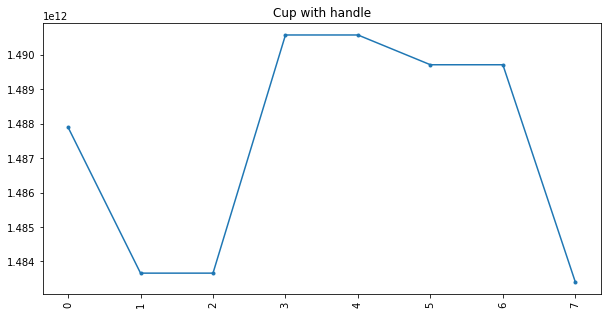

In [352]:
data3["xx"].value_counts()
graph_x = data3['Value'][1:9].tolist()
fig= plt.figure(figsize=(10, 5))
plt.title("Cup with handle")
plt.xticks(rotation=90)
plt.title("Cup with handle")
ax=plt.plot(graph_x,marker=".")
plt.show()

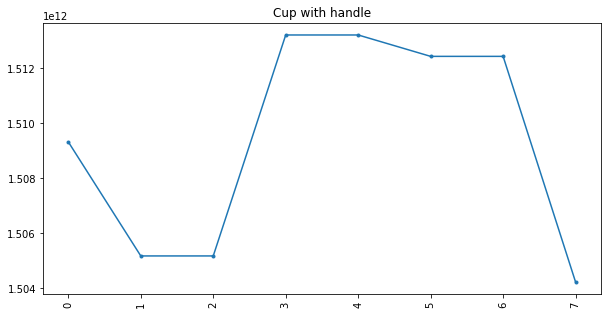

In [353]:
data = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Cup_With_Handle\\Cup_With_Handle_updated.csv', encoding="utf-8")
data['cup_bottom_point'] = data['cup_bottom_point'].apply(str)
data['cup_start_point'] = data['cup_start_point'] .apply(str)
data['end_point'] = data['end_point'] .apply(str)
data['handle_start_point'] = data['handle_start_point'] .apply(str)
data['start_point'] = data['start_point'] .apply(str)
data['x']=data['cup_bottom_point']+","+data['cup_start_point']+","+data['end_point']+","+data['handle_start_point']+","+data['start_point']
data['y']=['cup_bottom_point','cup_start_point','end_point','handle_start_point','start_point']
data = data.drop(columns=['Unnamed: 0'])
data1=data[["x","y"]]
data1.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\cup_with_handle\\cup_with_handle_updated1_only_co-ordinates.csv')
data11 = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\cup_with_handle\\cup_with_handle_updated1_only_co-ordinates.csv', encoding = "utf-8")
data11 = data11.drop(columns=['Unnamed: 0'])
data2 = pd.DataFrame(data11)
data2["first_x"] = data2["x"][1]
data2["first_y"] = data2["y"][1]
data2["first_x"][1:4] = ""
data2["first_y"][1:4] = ""
data2["x"].apply(lambda x: len(x.split(',')))
data3 = data2.drop(columns=['x','y'])
newx = data3["first_x"].str.split(",", n =4, expand = True)
newy = data3["first_y"].str.split(",", n =4, expand = True)
data3["x_0"] = pd.to_numeric(newx[0])
data3["x_1"] = pd.to_numeric(newx[1])
data3["x_2"] = pd.to_numeric(newx[2])
data3["x_3"] = pd.to_numeric(newx[3])
data3["x_4"] = pd.to_numeric(newx[4])
data3 = data3.melt(id_vars = ["first_x","first_y"],
                 var_name = "xx",
                 value_name = "Value")

data3 = data3.sort_values(by = ["xx"])
data3 = data3.mask(data3.eq('None')).dropna()
data3['Value'].replace('',np.nan, inplace=True)
data3.dropna(subset=['Value'], inplace = True)
data3["xx"].value_counts()
graph_x = data3['Value'][1:9].tolist()
fig= plt.figure(figsize=(10, 5))
plt.title("Cup with handle")
plt.xticks(rotation=90)
plt.title("Cup with handle")
ax=plt.plot(graph_x,marker=".")
plt.show()

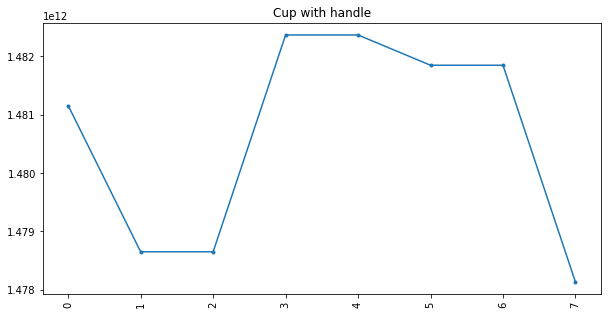

In [354]:
data = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Cup_With_Handle\\Cup_With_Handle_updated.csv', encoding="utf-8")
data['cup_bottom_point'] = data['cup_bottom_point'].apply(str)
data['cup_start_point'] = data['cup_start_point'] .apply(str)
data['end_point'] = data['end_point'] .apply(str)
data['handle_start_point'] = data['handle_start_point'] .apply(str)
data['start_point'] = data['start_point'] .apply(str)
data['x']=data['cup_bottom_point']+","+data['cup_start_point']+","+data['end_point']+","+data['handle_start_point']+","+data['start_point']
data['y']=['cup_bottom_point','cup_start_point','end_point','handle_start_point','start_point']
data = data.drop(columns=['Unnamed: 0'])
data1=data[["x","y"]]
data1.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\cup_with_handle\\cup_with_handle_updated1_only_co-ordinates.csv')
data11 = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\cup_with_handle\\cup_with_handle_updated1_only_co-ordinates.csv', encoding = "utf-8")
data11 = data11.drop(columns=['Unnamed: 0'])
data2 = pd.DataFrame(data11)
data2["first_x"] = data2["x"][2]
data2["first_y"] = data2["y"][2]
data2["first_x"][1:4] = ""
data2["first_y"][1:4] = ""
data2["x"].apply(lambda x: len(x.split(',')))
data3 = data2.drop(columns=['x','y'])
newx = data3["first_x"].str.split(",", n =4, expand = True)
newy = data3["first_y"].str.split(",", n =4, expand = True)
data3["x_0"] = pd.to_numeric(newx[0])
data3["x_1"] = pd.to_numeric(newx[1])
data3["x_2"] = pd.to_numeric(newx[2])
data3["x_3"] = pd.to_numeric(newx[3])
data3["x_4"] = pd.to_numeric(newx[4])
data3 = data3.melt(id_vars = ["first_x","first_y"],
                 var_name = "xx",
                 value_name = "Value")

data3 = data3.sort_values(by = ["xx"])
data3 = data3.mask(data3.eq('None')).dropna()
data3['Value'].replace('',np.nan, inplace=True)
data3.dropna(subset=['Value'], inplace = True)
data3["xx"].value_counts()
graph_x = data3['Value'][1:9].tolist()
fig= plt.figure(figsize=(10, 5))
plt.title("Cup with handle")
plt.xticks(rotation=90)
plt.title("Cup with handle")
ax=plt.plot(graph_x,marker=".")
plt.show()

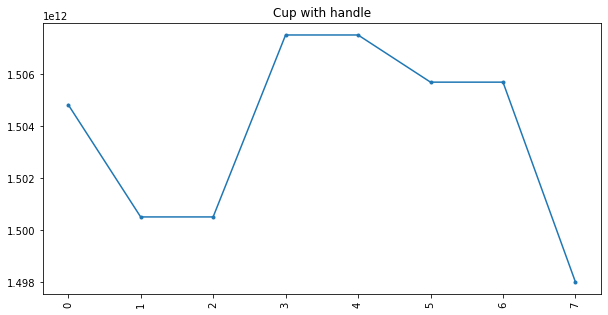

In [355]:
data = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Cup_With_Handle\\Cup_With_Handle_updated.csv', encoding="utf-8")
data['cup_bottom_point'] = data['cup_bottom_point'].apply(str)
data['cup_start_point'] = data['cup_start_point'] .apply(str)
data['end_point'] = data['end_point'] .apply(str)
data['handle_start_point'] = data['handle_start_point'] .apply(str)
data['start_point'] = data['start_point'] .apply(str)
data['x']=data['cup_bottom_point']+","+data['cup_start_point']+","+data['end_point']+","+data['handle_start_point']+","+data['start_point']
data['y']=['cup_bottom_point','cup_start_point','end_point','handle_start_point','start_point']
data = data.drop(columns=['Unnamed: 0'])
data1=data[["x","y"]]
data1.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\cup_with_handle\\cup_with_handle_updated1_only_co-ordinates.csv')
data11 = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\cup_with_handle\\cup_with_handle_updated1_only_co-ordinates.csv', encoding = "utf-8")
data11 = data11.drop(columns=['Unnamed: 0'])
data2 = pd.DataFrame(data11)
data2["first_x"] = data2["x"][3]
data2["first_y"] = data2["y"][3]
data2["first_x"][1:4] = ""
data2["first_y"][1:4] = ""
data2["x"].apply(lambda x: len(x.split(',')))
data3 = data2.drop(columns=['x','y'])
newx = data3["first_x"].str.split(",", n =4, expand = True)
newy = data3["first_y"].str.split(",", n =4, expand = True)
data3["x_0"] = pd.to_numeric(newx[0])
data3["x_1"] = pd.to_numeric(newx[1])
data3["x_2"] = pd.to_numeric(newx[2])
data3["x_3"] = pd.to_numeric(newx[3])
data3["x_4"] = pd.to_numeric(newx[4])
data3 = data3.melt(id_vars = ["first_x","first_y"],
                 var_name = "xx",
                 value_name = "Value")

data3 = data3.sort_values(by = ["xx"])
data3 = data3.mask(data3.eq('None')).dropna()
data3['Value'].replace('',np.nan, inplace=True)
data3.dropna(subset=['Value'], inplace = True)
data3["xx"].value_counts()
graph_x = data3['Value'][1:9].tolist()
fig= plt.figure(figsize=(10, 5))
plt.title("Cup with handle")
plt.xticks(rotation=90)
plt.title("Cup with handle")
ax=plt.plot(graph_x,marker=".")
plt.show()

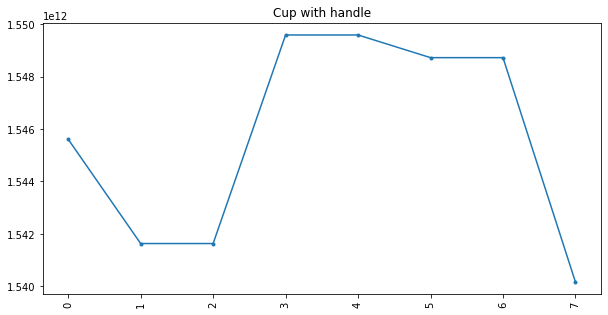

In [356]:
data = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\Cup_With_Handle\\Cup_With_Handle_updated.csv', encoding="utf-8")
data['cup_bottom_point'] = data['cup_bottom_point'].apply(str)
data['cup_start_point'] = data['cup_start_point'] .apply(str)
data['end_point'] = data['end_point'] .apply(str)
data['handle_start_point'] = data['handle_start_point'] .apply(str)
data['start_point'] = data['start_point'] .apply(str)
data['x']=data['cup_bottom_point']+","+data['cup_start_point']+","+data['end_point']+","+data['handle_start_point']+","+data['start_point']
data['y']=['cup_bottom_point','cup_start_point','end_point','handle_start_point','start_point']
data = data.drop(columns=['Unnamed: 0'])
data1=data[["x","y"]]
data1.to_csv('D:\\Learning\\Time Series Analysis - Real time data\\cup_with_handle\\cup_with_handle_updated1_only_co-ordinates.csv')
data11 = pd.read_csv('D:\\Learning\\Time Series Analysis - Real time data\\cup_with_handle\\cup_with_handle_updated1_only_co-ordinates.csv', encoding = "utf-8")
data11 = data11.drop(columns=['Unnamed: 0'])
data2 = pd.DataFrame(data11)
data2["first_x"] = data2["x"][4]
data2["first_y"] = data2["y"][4]
data2["first_x"][1:4] = ""
data2["first_y"][1:4] = ""
data2["x"].apply(lambda x: len(x.split(',')))
data3 = data2.drop(columns=['x','y'])
newx = data3["first_x"].str.split(",", n =4, expand = True)
newy = data3["first_y"].str.split(",", n =4, expand = True)
data3["x_0"] = pd.to_numeric(newx[0])
data3["x_1"] = pd.to_numeric(newx[1])
data3["x_2"] = pd.to_numeric(newx[2])
data3["x_3"] = pd.to_numeric(newx[3])
data3["x_4"] = pd.to_numeric(newx[4])
data3 = data3.melt(id_vars = ["first_x","first_y"],
                 var_name = "xx",
                 value_name = "Value")

data3 = data3.sort_values(by = ["xx"])
data3 = data3.mask(data3.eq('None')).dropna()
data3['Value'].replace('',np.nan, inplace=True)
data3.dropna(subset=['Value'], inplace = True)
data3["xx"].value_counts()
graph_x = data3['Value'][1:9].tolist()
fig= plt.figure(figsize=(10, 5))
plt.title("Cup with handle")
plt.xticks(rotation=90)
plt.title("Cup with handle")
ax=plt.plot(graph_x,marker=".")
plt.show()